# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Для того чтобы не было зависящих от сида случайных результатов")

Для того чтобы не было зависящих от сида случайных результатов


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


In [4]:
df_train.index.name = "id"
df_test.index.name = "id"

(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [5]:
for i in range(10):
  rand = random.randrange(1,stop=6998)
  print(df_train.loc[rand,:])

name             Mercedes-Benz New C-Class C 220 CDI BE Avantgare
year                                                         2011
selling_price                                             1350000
km_driven                                                   81500
fuel                                                       Diesel
seller_type                                            Individual
transmission                                            Automatic
owner                                                Second Owner
mileage                                                14.84 kmpl
engine                                                    2143 CC
max_power                                              167.62 bhp
torque                                        400Nm@ 1400-2800rpm
seats                                                         5.0
Name: 5239, dtype: object
name             Maruti Ignis 1.3 AMT Zeta
year                                  2017
selling_price                 

(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [6]:
df_test.head(n=5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
id,,,,,,,,,,,,,
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [7]:
df_test.tail(n=5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
id,,,,,,,,,,,,,
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [8]:
df_train.describe()

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [9]:
df_test.describe()

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


Теперь давайте рассмотрим распределение категориальных переменных

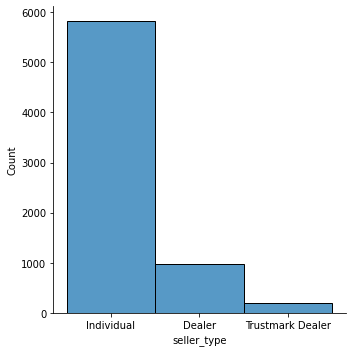

In [10]:
sns.displot(df_train["seller_type"])

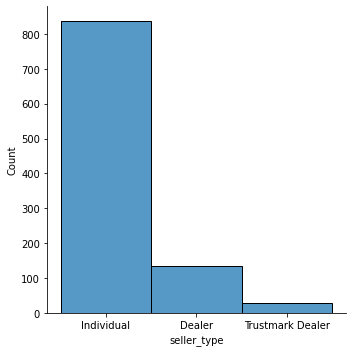

In [11]:
sns.displot(df_test["seller_type"])

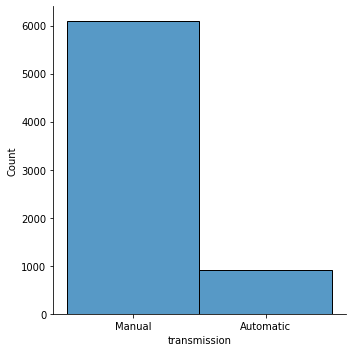

In [12]:
sns.displot(df_train["transmission"])

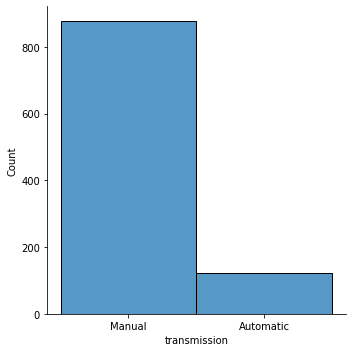

In [13]:
sns.displot(df_test["transmission"])

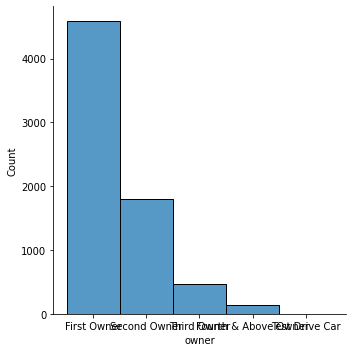

In [14]:
sns.displot(df_train["owner"])

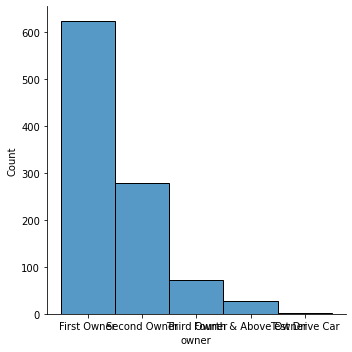

In [15]:
sns.displot(df_test["owner"])

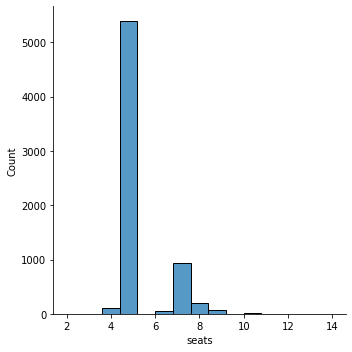

In [16]:
sns.displot(df_train["seats"], bins = 15)

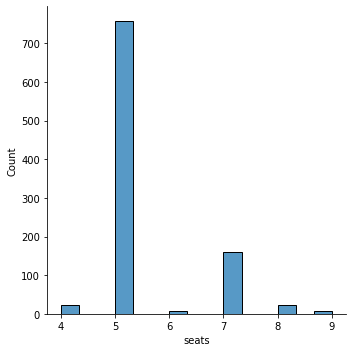

In [17]:
sns.displot(df_test["seats"], bins = 15)

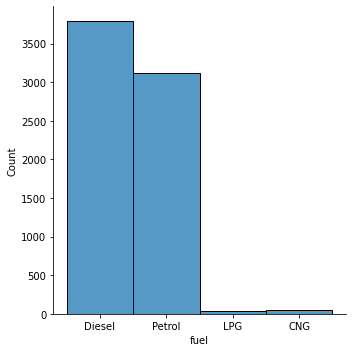

In [18]:
sns.displot(df_train["fuel"])

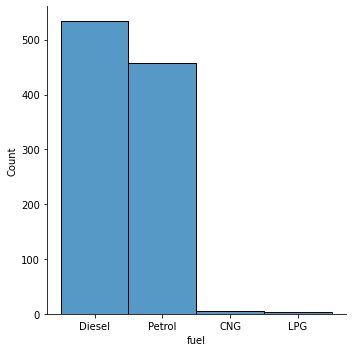

In [19]:
sns.displot(df_test["fuel"])

Из таблицы, представленной сверху, мы можем видеть, что некоторые из численных параметров (такие как mileage, engine, max_power и torque), из-за наличия единиц измерения в данных, не считаются численными признаками. Далее мы это исправим и посмотрим статистику и по этим столбцам.

(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [20]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

Да, в датасете есть пропуски в колонках mileage, engine, max_power, torque, seats

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [21]:
X_train = df_train
y_train = df_train["selling_price"]
X_train.drop(["selling_price"], axis=1, inplace = True)

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [22]:
Duplicates = X_train[X_train.duplicated()]
Duplicates.head(n=5)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
id,,,,,,,,,,,,
254,Hyundai Grand i10 Sportz,2017,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0


In [23]:
Duplicates.describe()

,year,km_driven,seats
count,1159.000000,1159.000000,1143.000000
mean,2015.783434,47576.900777,5.311461
std,3.172181,36876.431051,0.795742
min,1999.000000,1000.000000,4.000000
25%,2014.000000,20000.000000,5.000000
50%,2017.000000,40000.000000,5.000000
75%,2018.000000,69779.000000,5.000000
max,2020.000000,330000.000000,10.000000


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [24]:
X_train.drop_duplicates(inplace=True)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5840 entries, 0 to 6996
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          5840 non-null   object 
 1   year          5840 non-null   int64  
 2   km_driven     5840 non-null   int64  
 3   fuel          5840 non-null   object 
 4   seller_type   5840 non-null   object 
 5   transmission  5840 non-null   object 
 6   owner         5840 non-null   object 
 7   mileage       5654 non-null   object 
 8   engine        5654 non-null   object 
 9   max_power     5657 non-null   object 
 10  torque        5653 non-null   object 
 11  seats         5654 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 593.1+ KB


In [25]:
df_train = X_train.join(y_train)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5840 entries, 0 to 6996
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   km_driven      5840 non-null   int64  
 3   fuel           5840 non-null   object 
 4   seller_type    5840 non-null   object 
 5   transmission   5840 non-null   object 
 6   owner          5840 non-null   object 
 7   mileage        5654 non-null   object 
 8   engine         5654 non-null   object 
 9   max_power      5657 non-null   object 
 10  torque         5653 non-null   object 
 11  seats          5654 non-null   float64
 12  selling_price  5840 non-null   int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 767.8+ KB


In [26]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [27]:
df_train.reset_index(drop= True , inplace= True )

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [28]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    object 
 9   engine         981 non-null    object 
 10  max_power      981 non-null    object 
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 101.7+ KB


In [29]:
df_train[["mileage", "engine", "max_power"]] = df_train[["mileage", "engine", "max_power"]].replace(r"[^\d\.]", "", regex=True)
df_test[["mileage", "engine", "max_power"]] = df_test[["mileage", "engine", "max_power"]].replace(r"[^\d\.]", "", regex=True)

df_train.drop(["torque"], axis = 1, inplace = True)
df_test.drop(["torque"], axis = 1, inplace = True)

In [30]:
df_train.head(n=10)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,5.0,450000
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,370000
2,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,5.0,225000
3,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5.0,130000
4,Hyundai Xcent 1.2 VTVT E Plus,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5.0,440000
5,Maruti Wagon R LXI DUO BSIII,2007,175000,LPG,Individual,Manual,First Owner,17.3,1061,57.5,5.0,96000
6,Maruti 800 DX BSII,2001,5000,Petrol,Individual,Manual,Second Owner,16.1,796,37,4.0,45000
7,Toyota Etios VXD,2011,90000,Diesel,Individual,Manual,First Owner,23.59,1364,67.1,5.0,350000
8,Ford Figo Diesel Celebration Edition,2013,169000,Diesel,Individual,Manual,First Owner,20.0,1399,68.1,5.0,200000
9,Renault Duster 110PS Diesel RxL,2014,68000,Diesel,Individual,Manual,Second Owner,19.01,1461,108.45,5.0,500000


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [31]:
df_train["mileage"] = pd.to_numeric(df_train["mileage"])
df_train["engine"] = pd.to_numeric(df_train["engine"])
df_train["max_power"] = pd.to_numeric(df_train["max_power"])
df_train["seats"] = pd.to_numeric(df_train["seats"])

df_test["mileage"] = pd.to_numeric(df_train["mileage"])
df_test["engine"] = pd.to_numeric(df_train["engine"])
df_test["max_power"] = pd.to_numeric(df_train["max_power"])
df_test["seats"] = pd.to_numeric(df_train["seats"])

In [32]:
for i in ["mileage", "engine", "max_power", "seats"]:
  df_train[i].fillna(df_train[i].median(),inplace = True)
  df_test[i].fillna(df_train[i].median(), inplace = True)

In [33]:
df_train.isna().sum()

name             0
year             0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
selling_price    0
dtype: int64

In [34]:
df_test.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [35]:
print("Потому как этот параметр имеет огранниченное и небольшое количество принимаемых значений. Более того, данный параметр может нелинейно влиять на значение таргета")

Потому как этот параметр имеет огранниченное и небольшое количество принимаемых значений. Более того, данный параметр может нелинейно влиять на значение таргета


In [36]:
# your code here
df_train["engine"]= df_train["engine"].apply(np.int64)
df_train["seats"] = df_train["seats"].apply(np.int64)

df_test["engine"]= df_train["engine"].apply(np.int64)
df_test["seats"] = df_train["seats"].apply(np.int64)

In [37]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   km_driven      5840 non-null   int64  
 3   fuel           5840 non-null   object 
 4   seller_type    5840 non-null   object 
 5   transmission   5840 non-null   object 
 6   owner          5840 non-null   object 
 7   mileage        5840 non-null   float64
 8   engine         5840 non-null   int64  
 9   max_power      5840 non-null   float64
 10  seats          5840 non-null   int64  
 11  selling_price  5840 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 547.6+ KB


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

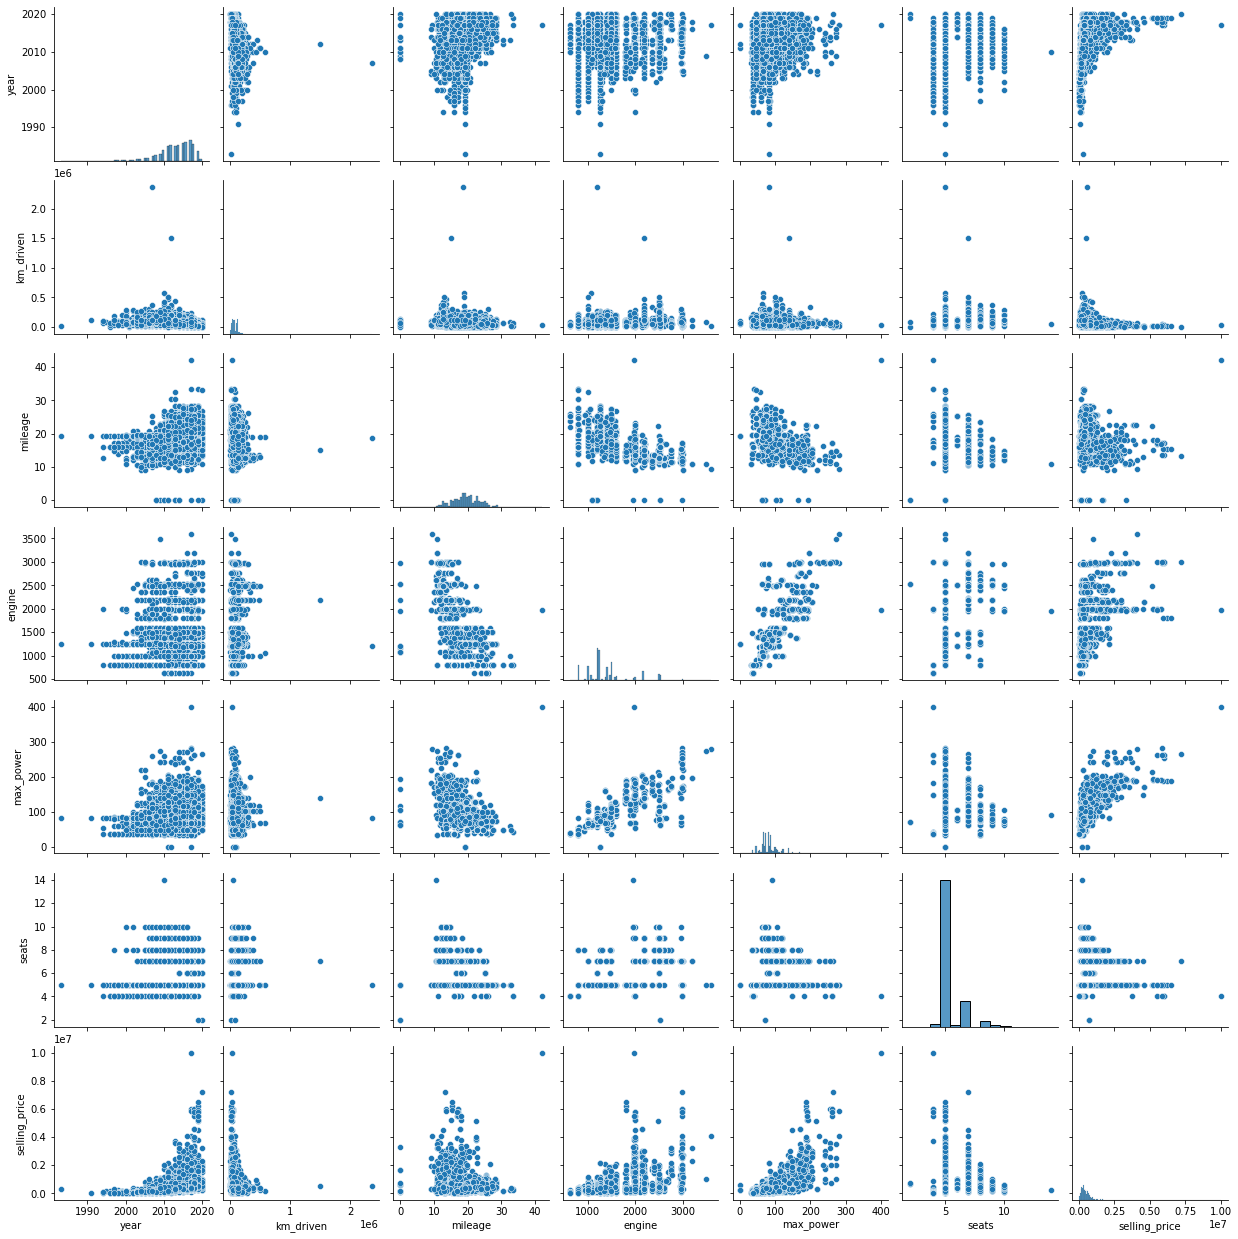

In [38]:
# your code here
sns.pairplot(df_train[["year", "km_driven", "mileage", "engine", "max_power", "seats" , "selling_price"]])

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной? </font>

Из нижней линии графиков мы можем видеть, что целевая переменная линейно связана с численными параметрами: новизна машины напрямую влияет на стоимость продажи -- чем новее автомобиль, тем дороже он стоит.

Чем меньше пробег автомобиля, тем выше стоимость автомобиля.

Увеличение мощности и максимальной мощности двигателя положительно влияют на цену автомобиля.

Увеличение количества сидений в автомобиле негативно влияет на стоимость автомобиля.

* <font color='#FF6600'> Что можно сказать о корреляциях признаков? </font>

Из признаков с выраженной корреляцией можно выделить признаки engine и max_power. Признаки положительно скоррелированы.


(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

In [39]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        1000 non-null   float64
 9   engine         1000 non-null   int64  
 10  max_power      1000 non-null   float64
 11  seats          1000 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


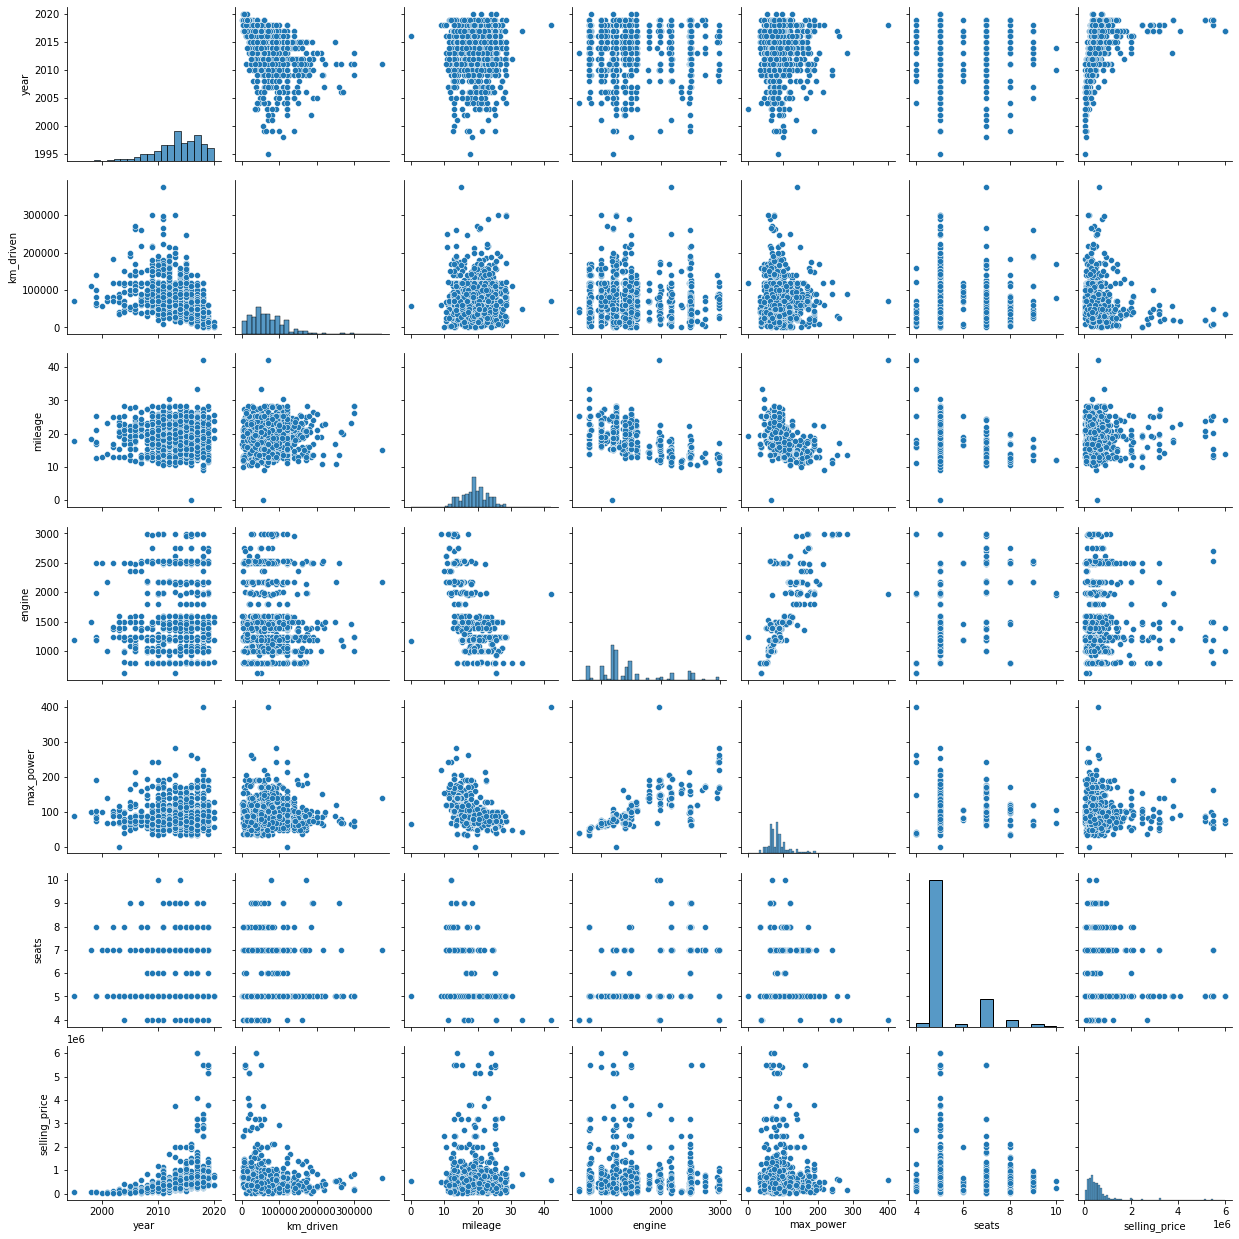

In [40]:
# your code here
sns.pairplot(df_test[["year", "km_driven", "mileage", "engine", "max_power", "seats" , "selling_price"]])

Из графиков сверху мы можем сделать вывод о том, что распределение переменных между тестовой и тренировочной выборкой примерно одинаковое. 

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

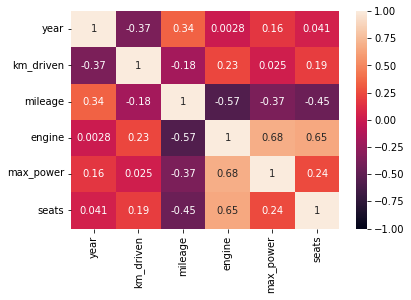

In [41]:
# your code here
heatmap = sns.heatmap(df_train[["year", "km_driven", "mileage", "engine", "max_power", "seats"]].corr(), vmin=-1, vmax=1, annot = True)

plt.show()

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>

Наименее скореллированными являются признаки engine и year. Их корреляция практически равна нулю

* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>

Как и было отмечено выше, довольно сильная корреляция наблюдается между признаками max_power и engine

* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

В какой-то степени мы можем так утверждать. Чем больше год (новее машина), тем меньше значение переменной km_driven. Такой вывод мы можем сделать из отрицательного значения корреляции между двумя этими переменными

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

<AxesSubplot:xlabel='engine', ylabel='max_power'>

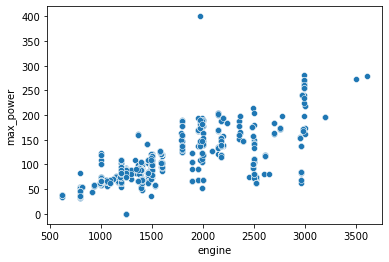

In [42]:
# your code here
sns.scatterplot(data = df_train, x = "engine", y = "max_power")

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [43]:
# your code here

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [44]:

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   km_driven      5840 non-null   int64  
 3   fuel           5840 non-null   object 
 4   seller_type    5840 non-null   object 
 5   transmission   5840 non-null   object 
 6   owner          5840 non-null   object 
 7   mileage        5840 non-null   float64
 8   engine         5840 non-null   int64  
 9   max_power      5840 non-null   float64
 10  seats          5840 non-null   int64  
 11  selling_price  5840 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 547.6+ KB


In [45]:
y_train = df_train["selling_price"]
X_train = df_train[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']]
#X_train.drop(["selling_price", "name", "fuel", "seller_type", "transmission", "owner"], axis = 1, inplace =True)

In [46]:
assert X_train.shape == (5840, 6)

In [47]:
y_test = df_test["selling_price"]
X_test = df_test[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']]

In [48]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict (X_test)

print("R-squared: " + str(r2_score(y_test,y_pred)))
print("MSE: " + str(MSE(y_test,y_pred)))
# your code here

R-squared: -0.11622069184014472
MSE: 641635528064.2155


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict (X_test)

print("R-squared: " + str(r2_score(y_test,y_pred)))
print("MSE: " + str(MSE(y_test,y_pred)))

R-squared: -0.11622069184016959
MSE: 641635528064.2297


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [51]:
list(zip(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats'], reg.coef_))


[('year', 152772.57084581413),
 ('km_driven', -44158.818520052766),
 ('mileage', 28833.925777517274),
 ('engine', 61178.49433684758),
 ('max_power', 322807.35325923417),
 ('seats', -23209.132485997423)]

In [52]:
reg.intercept_

522960.0910958868

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [53]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

y_train = df_train["selling_price"]
X_train = df_train[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']]

y_test = df_test["selling_price"]
X_test = df_test[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']]

X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lassoreg = Lasso(alpha = 1.0)
lassoreg.fit(X_train, y_train)
y_pred_lasso = lassoreg.predict(X_test)

print("R-squared: " + str(r2_score(y_test,y_pred_lasso)))
print("MSE: " + str(MSE(y_test,y_pred_lasso)))


R-squared: -0.18766899032085727
MSE: 682706050282.708


In [54]:
list(zip(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats'], lassoreg.coef_))

[('year', -1197660.7778950182),
 ('km_driven', 138667.61805870538),
 ('mileage', 396389.0475397382),
 ('engine', 278340.90803955623),
 ('max_power', 829859.4238534282),
 ('seats', -2827.4863845404097)]

<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

Нет, не занулились

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': np.arange(0.1, 10, 0.1)}
GSC = GridSearchCV(lassoreg, param_grid = param_grid, scoring = 'r2', cv=10, verbose=1)

GSC.fit(X_train, y_train)

Fitting 10 folds for each of 99 candidates, totalling 990 fits


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.667e+13, tolerance: 1.550e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.280e+13, tolerance: 1.550e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.442e+12, tolerance: 1.550e+11

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='r2', verbose=1)

In [56]:
GSC.best_params_

{'alpha': 9.9}

In [57]:
GSC.best_score_

0.43761992922444437

In [58]:
GSC.best_estimator_.coef_

array([-1197140.92082557,   138682.64205685,   396014.22477691,
         278299.39159794,   829782.85398001,    -2849.80200354])

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

30 секунд

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

Лучший коэффициент: 0.1. Нет, никакие из весов не занулились.

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [59]:
from sklearn.linear_model import ElasticNet

param_grid = {'alpha': np.arange(0.1, 10, 0.1), 'l1_ratio': np.arange(0.01, 1, 0.1)}
ENet = ElasticNet()
GSC = GridSearchCV(ENet, scoring='r2', param_grid = param_grid, n_jobs=-1)

GSC.fit(X_train, y_train)
# your code here

GridSearchCV(estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
                         'l1_ratio': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91])},
             scoring='r2')

In [60]:
GSC.best_params_

{'alpha': 0.1, 'l1_ratio': 0.91}

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

alpha: 9.9

l1_ratio: 0.91

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [61]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   km_driven      5840 non-null   int64  
 3   fuel           5840 non-null   object 
 4   seller_type    5840 non-null   object 
 5   transmission   5840 non-null   object 
 6   owner          5840 non-null   object 
 7   mileage        5840 non-null   float64
 8   engine         5840 non-null   int64  
 9   max_power      5840 non-null   float64
 10  seats          5840 non-null   int64  
 11  selling_price  5840 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 547.6+ KB


In [62]:
df_train.columns

Index(['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'seats', 'selling_price'],
      dtype='object')

In [63]:
X_train_cat = df_train[['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']]
X_test_cat = df_test[['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']]

In [64]:
assert X_train_cat.shape == (5840, 10)

In [65]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


In [66]:
X_train_cat

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
3,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
4,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5
...,...,...,...,...,...,...,...,...,...,...
5835,2008,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,5
5836,2013,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5
5837,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5
5838,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [67]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

X_train_dummies = pd.get_dummies(X_train_cat[["fuel", "seller_type", "transmission", "owner"]], prefix = ["fuel", "seller_type", "transmission", "owner"])
X_test_dummies = pd.get_dummies(X_test_cat[["fuel", "seller_type", "transmission", "owner"]], prefix = ["fuel", "seller_type", "transmission", "owner"])

X_train_dummies_seats = pd.get_dummies(X_train_cat["seats"], prefix = "seats")
X_test_dummies_seats = pd.get_dummies(X_test_cat["seats"], prefix = "seats")

X_train_dummies = X_train_dummies.merge(X_train_dummies_seats, right_index = True, left_index = True)
X_test_dummies = X_test_dummies.merge(X_test_dummies_seats, right_index = True, left_index = True)

In [68]:
X_train_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   fuel_CNG                      5840 non-null   uint8
 1   fuel_Diesel                   5840 non-null   uint8
 2   fuel_LPG                      5840 non-null   uint8
 3   fuel_Petrol                   5840 non-null   uint8
 4   seller_type_Dealer            5840 non-null   uint8
 5   seller_type_Individual        5840 non-null   uint8
 6   seller_type_Trustmark Dealer  5840 non-null   uint8
 7   transmission_Automatic        5840 non-null   uint8
 8   transmission_Manual           5840 non-null   uint8
 9   owner_First Owner             5840 non-null   uint8
 10  owner_Fourth & Above Owner    5840 non-null   uint8
 11  owner_Second Owner            5840 non-null   uint8
 12  owner_Test Drive Car          5840 non-null   uint8
 13  owner_Third Owner             584

In [69]:
X_test_dummies.columns

Index(['fuel_CNG', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'seats_4', 'seats_5',
       'seats_6', 'seats_7', 'seats_8', 'seats_9', 'seats_10'],
      dtype='object')

In [70]:
X_train_dummies = X_train_dummies[['fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Individual',
       'seller_type_Trustmark Dealer',
       'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner','seats_4',
       'seats_5', 'seats_6', 'seats_7', 'seats_8', 'seats_9', 'seats_10',
       'seats_14']]

X_test_dummies = X_test_dummies[['fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Individual',
       'seller_type_Trustmark Dealer',
       'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner','seats_4',
       'seats_5', 'seats_6', 'seats_7', 'seats_8', 'seats_9', 'seats_10']]

X_test_dummies['seats_14'] = 0

<ipython-input-70-619cc16f8fa2>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_dummies['seats_14'] = 0


In [71]:
X_train_cat = X_train_cat.merge(X_train_dummies, right_index = True, left_index = True)
X_test_cat = X_test_cat.merge(X_test_dummies, right_index = True, left_index = True)

In [72]:
X_train_cat.drop(["fuel", "seller_type", "transmission", "owner", "seats"], axis = 1, inplace = True)
X_test_cat.drop(["fuel", "seller_type", "transmission", "owner", "seats"], axis = 1, inplace = True)

X_test_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          1000 non-null   int64  
 1   km_driven                     1000 non-null   int64  
 2   mileage                       1000 non-null   float64
 3   engine                        1000 non-null   int64  
 4   max_power                     1000 non-null   float64
 5   fuel_Diesel                   1000 non-null   uint8  
 6   fuel_LPG                      1000 non-null   uint8  
 7   fuel_Petrol                   1000 non-null   uint8  
 8   seller_type_Individual        1000 non-null   uint8  
 9   seller_type_Trustmark Dealer  1000 non-null   uint8  
 10  transmission_Manual           1000 non-null   uint8  
 11  owner_Fourth & Above Owner    1000 non-null   uint8  
 12  owner_Second Owner            1000 non-null   uint8  
 13  owne

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [73]:
#from sklearn.linear_model import Ridge
#from sklearn.model_selection import GridSearchCV

#Ridge = Ridge()
#param_grid = ({'estimator__alpha': np.arange(0, 1, 0.05), 'preprocessing__one_hot__handle_unknown': ['infrequent_if_exist', 'ignore'],
#          'preprocessing__target_encoder__min_samples_leaf': range(1, 100, 10),
#          'preprocessing__target_encoder__smoothing': [0, .25, .5, .75, 1.],
#          'preprocessing__normalizer__norm': ['l2', 'l1'],})
#GSC = GridSearchCV(Ridge(), param_grid=param_grid, scoring='r2', n_jobs=-1, cv=10)
#GSC.fit(X_train, y_train)

# your code here

# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [74]:
X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          5840 non-null   int64  
 1   km_driven                     5840 non-null   int64  
 2   mileage                       5840 non-null   float64
 3   engine                        5840 non-null   int64  
 4   max_power                     5840 non-null   float64
 5   fuel_Diesel                   5840 non-null   uint8  
 6   fuel_LPG                      5840 non-null   uint8  
 7   fuel_Petrol                   5840 non-null   uint8  
 8   seller_type_Individual        5840 non-null   uint8  
 9   seller_type_Trustmark Dealer  5840 non-null   uint8  
 10  transmission_Manual           5840 non-null   uint8  
 11  owner_Fourth & Above Owner    5840 non-null   uint8  
 12  owner_Second Owner            5840 non-null   uint8  
 13  own

Давайте попробуем посчитать количество лощадей на единицу объема двигателя


In [75]:
X_train_cat["hp_per_volume"] = X_train_cat["max_power"]/ X_train_cat["engine"]
X_test_cat["hp_per_volume"] = X_test_cat["max_power"]/ X_test_cat["engine"]

# X_train_cat.drop(["max_power", "engine"], axis = 1, inplace = True)
# X_test_cat.drop(["max_power", "engine"], axis = 1, inplace = True)

Как предложено выше, давайте вместо года добавим квадрат года.

In [76]:
X_train_cat["year_squared"] = (X_train_cat["year"])^2 
X_test_cat["year_squared"] = (X_train_cat["year"])^2 

# X_train_cat.drop("year", axis = 1, inplace = True)
# X_test_cat.drop("year", axis = 1, inplace = True)

Далее, давайте добавим treshold для владельца автомобиля (объединим категории).

In [77]:
X_train_cat ["owner"] = df_train["owner"]
X_test_cat ["owner"] = df_test["owner"]

X_train_dummies = pd.get_dummies(X_train_cat["owner"], prefix = "owner")
X_test_dummies = pd.get_dummies(X_train_cat["owner"], prefix = "owner")
    
X_train_cat.drop(['owner_Fourth & Above Owner','owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner', 'owner'], axis = 1, inplace = True)
X_test_cat.drop(['owner_Fourth & Above Owner','owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner', 'owner'], axis = 1, inplace = True)




In [78]:
X_train_cat = X_train_cat.merge(X_train_dummies , left_index = True, right_index = True)
X_test_cat = X_test_cat.merge(X_test_dummies , left_index = True, right_index = True)

In [79]:
X_train_cat.columns

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'fuel_Diesel',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual', 'seats_4',
       'seats_5', 'seats_6', 'seats_7', 'seats_8', 'seats_9', 'seats_10',
       'seats_14', 'hp_per_volume', 'year_squared', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')

In [80]:
X_train_cat["dealer_or_first_owner"] = X_train_cat['owner_First Owner'] + X_train_cat['owner_Test Drive Car']
X_train_cat["second_or_above_owner"] = X_train_cat['owner_Fourth & Above Owner'] + X_train_cat['owner_Second Owner'] + X_train_cat['owner_Third Owner']

X_test_cat["dealer_or_first_owner"] = X_test_cat['owner_First Owner'] + X_test_cat['owner_Test Drive Car']
X_test_cat["second_or_above_owner"] = X_test_cat['owner_Fourth & Above Owner'] + X_test_cat['owner_Second Owner'] + X_test_cat['owner_Third Owner']

In [81]:
X_train_cat.drop(['owner_Test Drive Car', 'owner_First Owner', 'owner_Fourth & Above Owner', 'owner_Second Owner', 'owner_Third Owner'], axis = 1, inplace = True )
X_test_cat.drop(['owner_Test Drive Car', 'owner_First Owner', 'owner_Fourth & Above Owner', 'owner_Second Owner', 'owner_Third Owner'], axis = 1, inplace = True )

Теперь давайте удалим выбросы из выборки. Стоит отетить, что выбросы в данном случае будут удалены по признакам, не являющимся категориальными.

In [82]:
for i in X_train_cat.columns:
  X_train_cat = X_train_cat[(X_train_cat[i] <= X_train_cat[i].quantile(0.996))]

X_train_cat = X_train_cat.merge(df_train["selling_price"], left_index = True, right_index = True)
y_train = X_train_cat['selling_price']

X_train_cat.drop("selling_price", axis = 1,inplace = True)

In [83]:
X_train_cat.columns

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'fuel_Diesel',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual', 'seats_4',
       'seats_5', 'seats_6', 'seats_7', 'seats_8', 'seats_9', 'seats_10',
       'seats_14', 'hp_per_volume', 'year_squared', 'dealer_or_first_owner',
       'second_or_above_owner'],
      dtype='object')

In [84]:
X_train_cat = normalizer.fit_transform(X_train_cat)
X_test_cat = normalizer.transform(X_test_cat)
X_train_cat = scaler.fit_transform(X_train_cat)
X_test_cat = scaler.transform(X_test_cat)

lassoreg = Lasso(alpha = 1.0)
lassoreg.fit(X_train_cat, y_train)
y_pred_lasso = lassoreg.predict(X_test_cat)

print("R-squared: " + str(r2_score(y_test,y_pred_lasso)))
print("MSE: " + str(MSE(y_test,y_pred_lasso)))

R-squared: -0.06526852362105884
MSE: 612346766800.1914


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.562e+14, tolerance: 1.067e+11
  model = cd_fast.enet_coordinate_descent(


In [85]:
list(zip(['km_driven', 'mileage', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual', 'seats_4', 'seats_5', 'seats_6', 'seats_7',
       'seats_8', 'seats_9', 'seats_10', 'seats_14', 'hp_per_volume',
       'year_squared', 'dealer_or_first_owner', 'second_or_above_owner'], lassoreg.coef_))

[('km_driven', 153666.12504382743),
 ('mileage', 138427.66873041328),
 ('fuel_Diesel', 288661.90760361386),
 ('fuel_LPG', -222491.29240302343),
 ('fuel_Petrol', 1050824.6271672572),
 ('seller_type_Individual', -104331.89947141903),
 ('seller_type_Trustmark Dealer', -17721.449464442452),
 ('transmission_Manual', -245087.64648478845),
 ('seats_4', -19036.665549859215),
 ('seats_5', -11927.084586469316),
 ('seats_6', -29169.072020418043),
 ('seats_7', -38063.67803583736),
 ('seats_8', -398229.54317715135),
 ('seats_9', -70227.00836265968),
 ('seats_10', -107729.14159055307),
 ('seats_14', -37135.66856873061),
 ('hp_per_volume', -14393.04066993289),
 ('year_squared', 0.0),
 ('dealer_or_first_owner', 0.0),
 ('second_or_above_owner', -449633.3432532598)]

In [97]:
import json
print(json.dumps(df_test.loc[0, :].to_dict(), indent=2))

{
  "name": "Mahindra Xylo E4 BS IV",
  "year": 2010,
  "selling_price": 229999,
  "km_driven": 168000,
  "fuel": "Diesel",
  "seller_type": "Individual",
  "transmission": "Manual",
  "owner": "First Owner",
  "mileage": 23.4,
  "engine": 1248,
  "max_power": 74.0,
  "seats": 5
}


In [86]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': np.arange(0.1, 10, 0.1)}
GSC = GridSearchCV(lassoreg, param_grid = param_grid, scoring = 'r2', cv=10, verbose=1)

GSC.fit(X_train_cat, y_train)

Fitting 10 folds for each of 99 candidates, totalling 990 fits


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.126e+14, tolerance: 8.278e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.421e+14, tolerance: 1.006e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.253e+14, tolerance: 9.463e+10

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='r2', verbose=1)

In [87]:
GSC.best_params_

{'alpha': 9.9}

In [88]:
GSC.best_score_

0.4532276003864605

In [89]:
best_model_estimator = GSC.best_estimator_

best_model_estimator.fit(X_train_cat, y_train)

y_pred = best_model_estimator.predict(X_test_cat)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.353e+14, tolerance: 1.067e+11
  model = cd_fast.enet_coordinate_descent(


In [90]:
y_pred_sellingprice = np.expm1(y_pred)
y_test_sellingprice = y_test

<ipython-input-90-37f1a9196294>:1: RuntimeWarning: overflow encountered in expm1
  y_pred_sellingprice = np.expm1(y_pred)


In [92]:
import pickle
with open('model.pkl', 'wb') as handle:
    pickle.dump(best_model_estimator, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('model.pkl', 'rb') as handle:
    model = pickle.load(handle)

model

Lasso(alpha=9.9)

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [93]:
def business_metrics(y_true, y_pred):
    return (np.abs(y_true - y_pred) / y_true <= 0.1).mean()

business_metrics(y_test_sellingprice, y_pred_sellingprice)

0.0

# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [103]:
!pip install fastapi
!pip install uvicorn

!pip nest_asyncio
!pip pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: unknown command "nest_asyncio"
ERROR: unknown command "pyngrok"


In [96]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    df = Item
    print(df)
    X = df
    pred = model.predict(X)
    return {'your_price': np.expm1(pred[0])}

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link